### Smart Trash in Pittsburgh

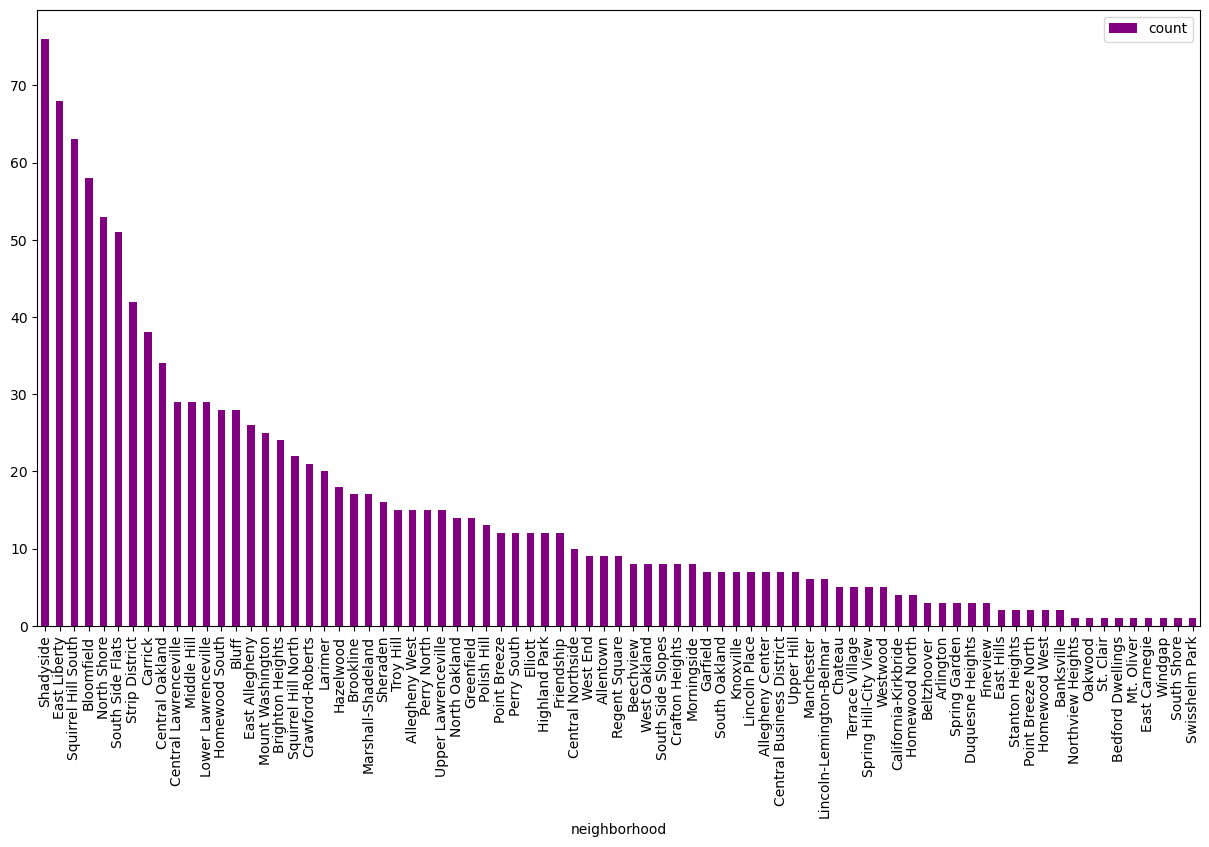

In [4]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

smart_trash_pandas = pd.read_csv("smart_trash_containers.csv")
smart_trash = smart_trash_pandas["neighborhood"].value_counts().sort_values(ascending=False)

smart_trash.plot(kind="bar", figsize=(15,8), color="purple")
plt.legend(bbox_to_anchor=(1,1))

neighborhoods = geopandas.read_file("Neighborhoods_.shp")

### What this data tells us
This data tells us that Shadyside has the largest number of smart trash containers, with East Liberty having the second largest amount of smart trash containers and Squirrel Hill South in third place. Smart trash containers are trash bins that implement sensors and sorting technologies to send analyitics to waste management, helping the recycling effort and preventing waste we can reuse go to the landfill. With this in mind, we can conclude that Shadyside is the most likely neighborhood to recycle its waste!

### Waste Recovery

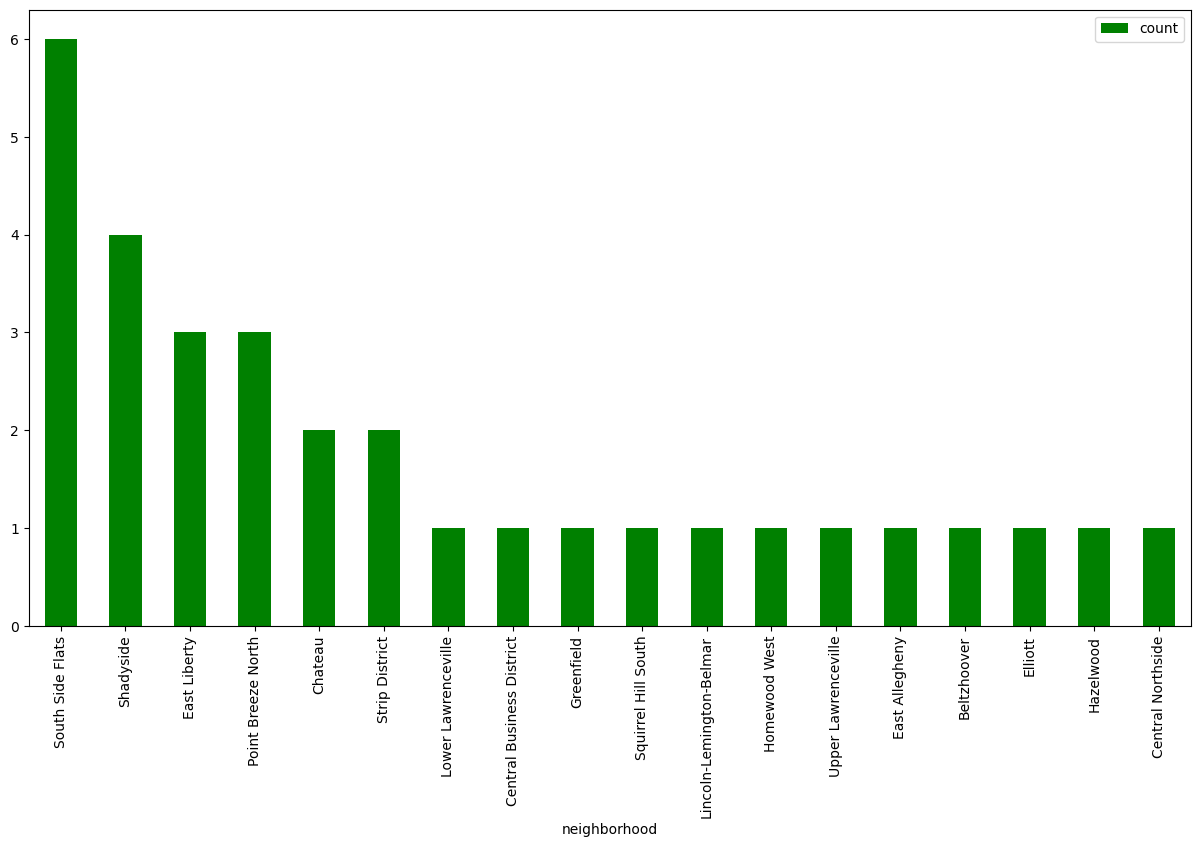

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

garb = pd.read_csv('waste_recovery_locations.csv') 
neighborhood_count = garb["neighborhood"].value_counts().sort_values(ascending=False)

neighborhood_count.plot(kind="bar", figsize=(15,8), color="green")
plt.legend(bbox_to_anchor=(1,1))

A waste recovery location is a specific spot where people can drop off their recycling for it to be reused and repurposed. The data on the graph shows that South Side Flats has the largest number for waste recovery locations totaling at 6, the second highest is shadyside totaling to 4. Most of the neighborhoods following have less and less, with most having only one waste recovery location. 

### Dollar Value of Trees

Text(0.5, 1.0, 'Total Dollar Value Gained From Trees in Pittsburgh by Neighborhood')

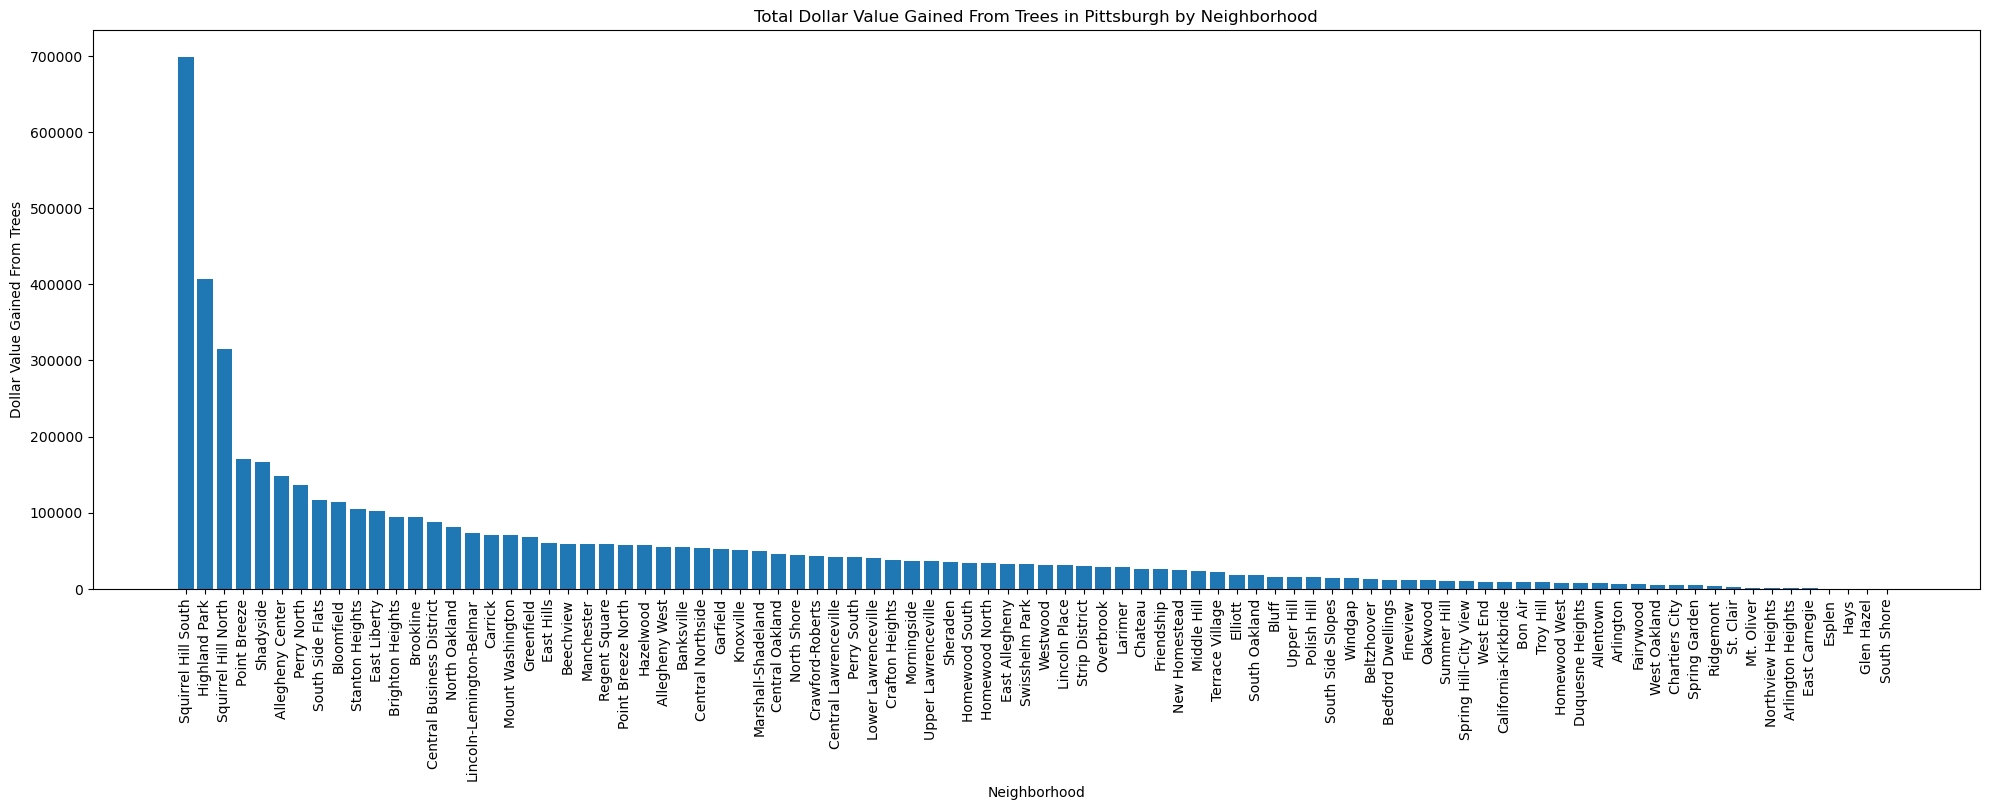

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

trees = pd.read_csv('trees.csv', low_memory=False)
neighborhood_dollar_value_from_trees = trees.groupby('neighborhood')['overall_benefits_dollar_value'].sum().reset_index()
dollar_values_sorted = neighborhood_dollar_value_from_trees.sort_values('overall_benefits_dollar_value', ascending=False)

plt.figure(figsize=(20,8))
plt.bar(dollar_values_sorted['neighborhood'], dollar_values_sorted['overall_benefits_dollar_value'])
plt.xlabel('Neighborhood')
plt.ylabel('Dollar Value Gained From Trees')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Total Dollar Value Gained From Trees in Pittsburgh by Neighborhood')
